In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam
from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:
class Funsolvea(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss") #loss_tracker pude ser cambiada por mivalor_de_costo o como queramos
        
        
    @property
    def metrics(self):
        return [self.loss_tracker] #igual cambia el loss_tracker
    
    
    def train_step(self, data):
        batch_size = 200 #Calibra la resolucion de la ec.dif
        x = tf.random.uniform((batch_size,1), minval=-1, maxval=1)
        
        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            #x_o = tf.zeros((batch_size,1))
            #y_o = self(x_o, training=True)
            eq = y_pred - 3.*tf.sin(math.pi*x)
            
            loss = keras.losses.mean_squared_error(0.,eq)
        
        #aplica los gradientes        
        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        
        #actualiza metricas
        self.loss_tracker.update_state(loss)
        
        return {"loss": self.loss_tracker.result()}
    


In [3]:
    model = Funsolvea()
    
    model.add(Dense(100,activation ='tanh', input_shape=(1,)))
    model.add(Dense(10, activation ='tanh'))
    model.add(Dense(10, activation ='tanh'))
    model.add(Dense(1, activation ='linear'))
    
    model.summary()
    
    epochs = 3000 #cuantas veces entrenar. En cada epoch hace una mejora en los parametros
    #learning_rate = 0.07
    
    model.compile(optimizer=RMSprop(), metrics=['loss'])
    
    x=tf.linspace(-1,1,100)
    history = model.fit(x,epochs=epochs,verbose=1)
    
    x_testv = tf.linspace(-1,1,100)
    a=model.predict(x_testv)
    

    model.save("RNA_EDO1_a.h5")

    

Model: "funsolvea"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               200       
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1331 (5.20 KB)
Trainable params: 1331 (5.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/3000
4/4 [==============================] - 1s 8ms/step - loss: 3.9571
Epoch 2/3000
4/4 [==============================] - 0s 3ms/step - loss: 3.4679

4/4 [==============================] - 0s 2ms/step - loss: 0.2432
Epoch 92/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2611
Epoch 93/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2522
Epoch 94/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.2310
Epoch 95/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2487
Epoch 96/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.2545
Epoch 97/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.2325
Epoch 98/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.2329
Epoch 99/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.2224
Epoch 100/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.2067
Epoch 101/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2396
Epoch 102/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.2091
Epoch 103/3000
4/4 [==============================]

4/4 [==============================] - 0s 4ms/step - loss: 0.0968
Epoch 193/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.1127
Epoch 194/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.1147
Epoch 195/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.1077
Epoch 196/3000
4/4 [==============================] - 0s 8ms/step - loss: 0.0932
Epoch 197/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0919
Epoch 198/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0969
Epoch 199/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0900
Epoch 200/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0926
Epoch 201/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.1243
Epoch 202/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0930
Epoch 203/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0856
Epoch 204/3000
4/4 [=======================

4/4 [==============================] - 0s 4ms/step - loss: 0.0653
Epoch 294/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0637
Epoch 295/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0488
Epoch 296/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0438
Epoch 297/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0859
Epoch 298/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0555
Epoch 299/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0559
Epoch 300/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0592
Epoch 301/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0505
Epoch 302/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0686
Epoch 303/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0521
Epoch 304/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0611
Epoch 305/3000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0281
Epoch 395/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0342
Epoch 396/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0266
Epoch 397/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0226
Epoch 398/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0295
Epoch 399/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0189
Epoch 400/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 401/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0260
Epoch 402/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0600
Epoch 403/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0220
Epoch 404/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0227
Epoch 405/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0213
Epoch 406/3000
4/4 [=======================

4/4 [==============================] - 0s 4ms/step - loss: 0.0154
Epoch 496/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0236
Epoch 497/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0264
Epoch 498/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0178
Epoch 499/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0159
Epoch 500/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0263
Epoch 501/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0200
Epoch 502/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0215
Epoch 503/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0146
Epoch 504/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0100
Epoch 505/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0351
Epoch 506/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0209
Epoch 507/3000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 0.0252
Epoch 597/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0074
Epoch 598/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 599/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 600/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0257
Epoch 601/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0145
Epoch 602/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0114
Epoch 603/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0227
Epoch 604/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0236
Epoch 605/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0138
Epoch 606/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 607/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0155
Epoch 608/3000
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 698/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0128
Epoch 699/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 700/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 701/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0211
Epoch 702/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0082
Epoch 703/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0140
Epoch 704/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0247
Epoch 705/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 706/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 707/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0130
Epoch 708/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0055
Epoch 709/3000
4/4 [=======================

4/4 [==============================] - 0s 4ms/step - loss: 0.0151
Epoch 799/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0358
Epoch 800/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 801/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 802/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0206
Epoch 803/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0094
Epoch 804/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0177
Epoch 805/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0186
Epoch 806/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0095
Epoch 807/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0171
Epoch 808/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0159
Epoch 809/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 810/3000
4/4 [=======================

4/4 [==============================] - 0s 4ms/step - loss: 0.0090
Epoch 900/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0225
Epoch 901/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0168
Epoch 902/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 903/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0107
Epoch 904/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0253
Epoch 905/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0160
Epoch 906/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 907/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0089
Epoch 908/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0224
Epoch 909/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0142
Epoch 910/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0129
Epoch 911/3000
4/4 [=======================

4/4 [==============================] - 0s 3ms/step - loss: 0.0223
Epoch 1001/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 1002/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 1003/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0146
Epoch 1004/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0143
Epoch 1005/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0202
Epoch 1006/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0061
Epoch 1007/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0044
Epoch 1008/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0160
Epoch 1009/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0266
Epoch 1010/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0111
Epoch 1011/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0125
Epoch 1012/3000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.0079
Epoch 1101/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0063
Epoch 1102/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0243
Epoch 1103/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0068
Epoch 1104/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0158
Epoch 1105/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0066
Epoch 1106/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0080
Epoch 1107/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 1108/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0198
Epoch 1109/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 1110/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0138
Epoch 1111/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 1112/3000
4/4 [===========

4/4 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 1201/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0114
Epoch 1202/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0118
Epoch 1203/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0237
Epoch 1204/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 1205/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 1206/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0129
Epoch 1207/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0150
Epoch 1208/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0128
Epoch 1209/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0080
Epoch 1210/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 1211/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0106
Epoch 1212/3000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 1301/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0114
Epoch 1302/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0079
Epoch 1303/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0109
Epoch 1304/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 1305/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0131
Epoch 1306/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 1307/3000
4/4 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 1308/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 1309/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0178
Epoch 1310/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0131
Epoch 1311/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0053
Epoch 1312/3000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 1401/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0055
Epoch 1402/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0175
Epoch 1403/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 1404/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 1405/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0071
Epoch 1406/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0120
Epoch 1407/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0226
Epoch 1408/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 1409/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 1410/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 1411/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0112
Epoch 1412/3000
4/4 [===========

4/4 [==============================] - 0s 4ms/step - loss: 0.0141
Epoch 1501/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 1502/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 1503/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 1504/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 1505/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0090
Epoch 1506/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0157
Epoch 1507/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0164
Epoch 1508/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 1509/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 1510/3000
4/4 [==============================] - 0s 8ms/step - loss: 0.0094
Epoch 1511/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0114
Epoch 1512/3000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 1601/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 1602/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0030
Epoch 1603/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0107
Epoch 1604/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0131
Epoch 1605/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 1606/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0130
Epoch 1607/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 1608/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 1609/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 1610/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 1611/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0059
Epoch 1612/3000
4/4 [===========

4/4 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 1701/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0122
Epoch 1702/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0105
Epoch 1703/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0066
Epoch 1704/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 1705/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 1706/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 1707/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0127
Epoch 1708/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0060
Epoch 1709/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 1710/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0072
Epoch 1711/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0117
Epoch 1712/3000
4/4 [===========

4/4 [==============================] - 0s 4ms/step - loss: 0.0050
Epoch 1801/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0064
Epoch 1802/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0084
Epoch 1803/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0141
Epoch 1804/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0096
Epoch 1805/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 1806/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 1807/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 1808/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0143
Epoch 1809/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 1810/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0055
Epoch 1811/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0060
Epoch 1812/3000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 1901/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0099
Epoch 1902/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0070
Epoch 1903/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0016
Epoch 1904/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 1905/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0163
Epoch 1906/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 1907/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 1908/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 1909/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0066
Epoch 1910/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 1911/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0175
Epoch 1912/3000
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 7.4401e-04
Epoch 2001/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0047
Epoch 2002/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0182
Epoch 2003/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 2004/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 2005/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 2006/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 2007/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 2008/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 2009/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0048
Epoch 2010/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0054
Epoch 2011/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0085
Epoch 2012/3000
4/4 [=======

4/4 [==============================] - 0s 4ms/step - loss: 0.0081
Epoch 2101/3000
4/4 [==============================] - 0s 6ms/step - loss: 0.0069
Epoch 2102/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 2103/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0062
Epoch 2104/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0080
Epoch 2105/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0050
Epoch 2106/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 2107/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 2108/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 2109/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0054
Epoch 2110/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0064
Epoch 2111/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 2112/3000
4/4 [===========

4/4 [==============================] - 0s 4ms/step - loss: 0.0098
Epoch 2201/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 2202/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 2203/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 2204/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 2205/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0137
Epoch 2206/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 2207/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 2208/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0050
Epoch 2209/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0107
Epoch 2210/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0048
Epoch 2211/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 2212/3000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 2301/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 2302/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 2303/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0118
Epoch 2304/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 2305/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 2306/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 2307/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 2308/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 2309/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 2310/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 2311/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0054
Epoch 2312/3000
4/4 [===========

4/4 [==============================] - 0s 4ms/step - loss: 0.0054
Epoch 2401/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 2402/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0063
Epoch 2403/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 2404/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 2405/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 2406/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0115
Epoch 2407/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 2408/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 2409/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 2410/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 2411/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0130
Epoch 2412/3000
4/4 [===========

4/4 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 2501/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0065
Epoch 2502/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0079
Epoch 2503/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 2504/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0027
Epoch 2505/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 2506/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0096
Epoch 2507/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0050
Epoch 2508/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 2509/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 2510/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0065
Epoch 2511/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 2512/3000
4/4 [===========

Epoch 2600/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 2601/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 2602/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0030
Epoch 2603/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0092
Epoch 2604/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 2605/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 2606/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 2607/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0080
Epoch 2608/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0055
Epoch 2609/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 2610/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 2611/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 2612/3000


4/4 [==============================] - 0s 4ms/step - loss: 0.0046
Epoch 2700/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0069
Epoch 2701/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0054
Epoch 2702/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 2703/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 2704/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 2705/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0076
Epoch 2706/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0102
Epoch 2707/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 2708/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 2709/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0083
Epoch 2710/3000
4/4 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 2711/3000
4/4 [===========

4/4 [==============================] - 0s 6ms/step - loss: 0.0041
Epoch 2800/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0086
Epoch 2801/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0048
Epoch 2802/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 2803/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 2804/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0080
Epoch 2805/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 2806/3000
4/4 [==============================] - 0s 2ms/step - loss: 8.6227e-04
Epoch 2807/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 2808/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 2809/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 2810/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 2811/3000
4/4 [=======

Epoch 2899/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 2900/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0048
Epoch 2901/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0074
Epoch 2902/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 2903/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0043
Epoch 2904/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 2905/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 2906/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 2907/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0083
Epoch 2908/3000
4/4 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 2909/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 2910/3000
4/4 [==============================] - 0s 4ms/step - loss: 0.0065
Epoch 2911/3000


4/4 [==============================] - 0s 6ms/step - loss: 0.0082
Epoch 2999/3000
4/4 [==============================] - 0s 5ms/step - loss: 0.0078
Epoch 3000/3000
4/4 [==============================] - 0s 7ms/step


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


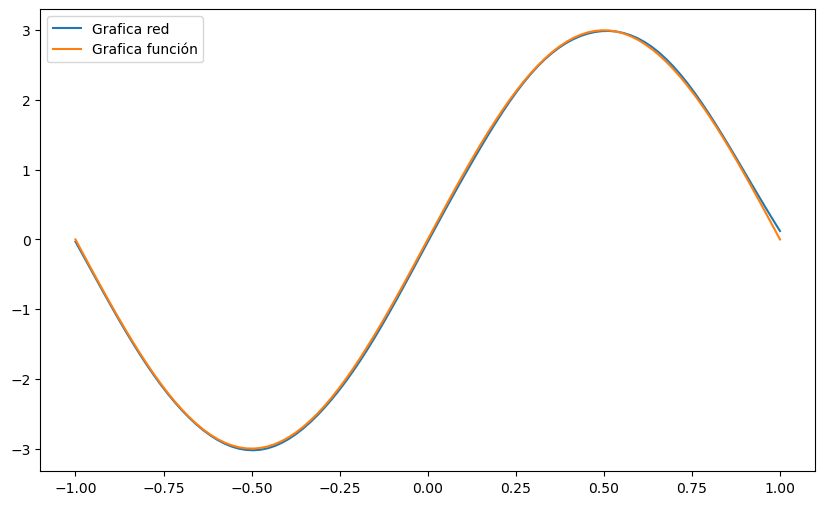

In [4]:
plt.figure(figsize=(10,6))
plt.plot(x_testv,a)
plt.plot(x_testv, 3*np.sin(np.pi*x))
legend = ['Grafica red','Grafica función']
plt.legend(loc='upper left', labels= legend)
plt.show()

In [22]:
class Funsolveb(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss") #loss_tracker pude ser cambiada por mivalor_de_costo o como queramos
        
        
    @property
    def metrics(self):
        return [self.loss_tracker] #igual cambia el loss_tracker
    
    
    def train_step(self, data):
        batch_size =100 #Calibra la resolucion de la ec.dif
        x = tf.random.uniform((batch_size,1), minval=-1, maxval=1)
        
        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            #x_o = tf.zeros((batch_size,1))
            #y_o = self(x_o, training=True)
            eq = y_pred - 1 - 2*x - 4*x**3
            #eq =   1 + 2*x + 4*(x**3)
            #ic = y_o - 1.
            loss = keras.losses.mean_squared_error(0.,eq)
        
        #aplica los gradientes        
        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        
        
        #actualiza metricas
        self.loss_tracker.update_state(loss)
        
        return {"loss": self.loss_tracker.result()}
    
    
    


In [31]:
    model2 = Funsolveb()
    
    model2.add(Dense(10,activation ='tanh', input_shape=(1,)))
    #model.add(Dropout(0.2))
    model2.add(Dense(10, activation ='tanh'))
    model2.add(Dense(50, activation ='tanh'))
    model2.add(Dense(50, activation ='tanh'))
    model2.add(Dense(10, activation ='tanh'))
    model2.add(Dense(1, activation ='tanh'))
    model2.add(Dense(1, activation ='linear'))
    
    model2.summary()
    
    model2.compile(optimizer=RMSprop(), metrics=['loss'])
    
    x=tf.linspace(-1,1,100)
    history = model2.fit(x,epochs=4000,verbose=1)
    
    x_test = tf.linspace(-1,1,100)
    a=model2.predict(x_test)
    

model.save("RNA_EDO1_b.h5")

Model: "funsolveb_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 10)                20        
                                                                 
 dense_70 (Dense)            (None, 10)                110       
                                                                 
 dense_71 (Dense)            (None, 50)                550       
                                                                 
 dense_72 (Dense)            (None, 50)                2550      
                                                                 
 dense_73 (Dense)            (None, 10)                510       
                                                                 
 dense_74 (Dense)            (None, 1)                 11        
                                                                 
 dense_75 (Dense)            (None, 1)                 

4/4 [==============================] - 0s 6ms/step - loss: 3.5505
Epoch 188/4000
4/4 [==============================] - 0s 5ms/step - loss: 3.1108
Epoch 189/4000
4/4 [==============================] - 0s 6ms/step - loss: 2.9863
Epoch 190/4000
4/4 [==============================] - 0s 5ms/step - loss: 3.1486
Epoch 191/4000
4/4 [==============================] - 0s 0s/step - loss: 3.4840
Epoch 192/4000
4/4 [==============================] - 0s 0s/step - loss: 3.5466
Epoch 193/4000
4/4 [==============================] - 0s 0s/step - loss: 3.2766
Epoch 194/4000
4/4 [==============================] - 0s 0s/step - loss: 3.3832
Epoch 195/4000
4/4 [==============================] - 0s 5ms/step - loss: 3.1837
Epoch 196/4000
4/4 [==============================] - 0s 6ms/step - loss: 3.3340
Epoch 197/4000
4/4 [==============================] - 0s 6ms/step - loss: 3.1278
Epoch 198/4000
4/4 [==============================] - 0s 5ms/step - loss: 3.4011
Epoch 199/4000
4/4 [===========================

4/4 [==============================] - 0s 5ms/step - loss: 2.0897
Epoch 390/4000
4/4 [==============================] - 0s 3ms/step - loss: 1.5215
Epoch 391/4000
4/4 [==============================] - 0s 1ms/step - loss: 2.0486
Epoch 392/4000
4/4 [==============================] - 0s 518us/step - loss: 1.6859
Epoch 393/4000
4/4 [==============================] - 0s 396us/step - loss: 2.4365
Epoch 394/4000
4/4 [==============================] - 0s 4ms/step - loss: 1.9842
Epoch 395/4000
4/4 [==============================] - 0s 4ms/step - loss: 2.0793
Epoch 396/4000
4/4 [==============================] - 0s 5ms/step - loss: 1.8981
Epoch 397/4000
4/4 [==============================] - 0s 6ms/step - loss: 2.0780
Epoch 398/4000
4/4 [==============================] - 0s 5ms/step - loss: 1.9394
Epoch 399/4000
4/4 [==============================] - 0s 6ms/step - loss: 2.0970
Epoch 400/4000
4/4 [==============================] - 0s 5ms/step - loss: 1.6992
Epoch 401/4000
4/4 [===================

4/4 [==============================] - 0s 3ms/step - loss: 0.9175
Epoch 592/4000
4/4 [==============================] - 0s 11ms/step - loss: 1.0070
Epoch 593/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.9954
Epoch 594/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.9617
Epoch 595/4000
4/4 [==============================] - 0s 0s/step - loss: 0.9494
Epoch 596/4000
4/4 [==============================] - 0s 0s/step - loss: 0.7514
Epoch 597/4000
4/4 [==============================] - 0s 0s/step - loss: 0.9052
Epoch 598/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.9515
Epoch 599/4000
4/4 [==============================] - 0s 6ms/step - loss: 1.0368
Epoch 600/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.9480
Epoch 601/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.8132
Epoch 602/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.9338
Epoch 603/4000
4/4 [=========================

4/4 [==============================] - 0s 4ms/step - loss: 0.3655
Epoch 794/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.4383
Epoch 795/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.4287
Epoch 796/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.3523
Epoch 797/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.3914
Epoch 798/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.4547
Epoch 799/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.4109
Epoch 800/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.3222
Epoch 801/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.4390
Epoch 802/4000
4/4 [==============================] - 0s 901us/step - loss: 0.3696
Epoch 803/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.3677
Epoch 804/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.4363
Epoch 805/4000
4/4 [=====================

4/4 [==============================] - 0s 4ms/step - loss: 0.1641
Epoch 996/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.1476
Epoch 997/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.1468
Epoch 998/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.1239
Epoch 999/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.1649
Epoch 1000/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.1499
Epoch 1001/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.1255
Epoch 1002/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.1416
Epoch 1003/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.1364
Epoch 1004/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.1512
Epoch 1005/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.1861
Epoch 1006/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.1165
Epoch 1007/4000
4/4 [===============

4/4 [==============================] - 0s 4ms/step - loss: 0.0940
Epoch 1096/4000
4/4 [==============================] - 0s 3ms/step - loss: 0.0639
Epoch 1097/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0900
Epoch 1098/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0877
Epoch 1099/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0774
Epoch 1100/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0601
Epoch 1101/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0934
Epoch 1102/4000
4/4 [==============================] - 0s 961us/step - loss: 0.0625
Epoch 1103/4000
4/4 [==============================] - 0s 766us/step - loss: 0.0796
Epoch 1104/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0816
Epoch 1105/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0771
Epoch 1106/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0680
Epoch 1107/4000
4/4 [=======

4/4 [==============================] - 0s 5ms/step - loss: 0.0389
Epoch 1196/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0483
Epoch 1197/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.0521
Epoch 1198/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0439
Epoch 1199/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0386
Epoch 1200/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0530
Epoch 1201/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0462
Epoch 1202/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0464
Epoch 1203/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0450
Epoch 1204/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0417
Epoch 1205/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0296
Epoch 1206/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0380
Epoch 1207/4000
4/4 [===========

4/4 [==============================] - 0s 4ms/step - loss: 0.0236
Epoch 1296/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0190
Epoch 1297/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0383
Epoch 1298/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0248
Epoch 1299/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0394
Epoch 1300/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0224
Epoch 1301/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0217
Epoch 1302/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0296
Epoch 1303/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0438
Epoch 1304/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0285
Epoch 1305/4000
4/4 [==============================] - 0s 604us/step - loss: 0.0138
Epoch 1306/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0297
Epoch 1307/4000
4/4 [=========

4/4 [==============================] - 0s 4ms/step - loss: 0.0241
Epoch 1396/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0162
Epoch 1397/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0211
Epoch 1398/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0177
Epoch 1399/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0176
Epoch 1400/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0311
Epoch 1401/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0272
Epoch 1402/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0092
Epoch 1403/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0358
Epoch 1404/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0144
Epoch 1405/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0396
Epoch 1406/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 1407/4000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.0243
Epoch 1496/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0204
Epoch 1497/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0322
Epoch 1498/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 1499/4000
4/4 [==============================] - 0s 730us/step - loss: 0.0263
Epoch 1500/4000
4/4 [==============================] - 0s 505us/step - loss: 0.0091
Epoch 1501/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0112
Epoch 1502/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0251
Epoch 1503/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0336
Epoch 1504/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0056
Epoch 1505/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0109
Epoch 1506/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0248
Epoch 1507/4000
4/4 [=======

4/4 [==============================] - 0s 2ms/step - loss: 0.0227
Epoch 1596/4000
4/4 [==============================] - 0s 10ms/step - loss: 0.0173
Epoch 1597/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0242
Epoch 1598/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 1599/4000
4/4 [==============================] - 0s 0s/step - loss: 0.0207
Epoch 1600/4000
4/4 [==============================] - 0s 0s/step - loss: 0.0201
Epoch 1601/4000
4/4 [==============================] - 0s 0s/step - loss: 0.0188
Epoch 1602/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0172
Epoch 1603/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0189
Epoch 1604/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0184
Epoch 1605/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0151
Epoch 1606/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0186
Epoch 1607/4000
4/4 [=============

4/4 [==============================] - 0s 2ms/step - loss: 0.0161
Epoch 1796/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0254
Epoch 1797/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0179
Epoch 1798/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0086
Epoch 1799/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0156
Epoch 1800/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0330
Epoch 1801/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0101
Epoch 1802/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0062
Epoch 1803/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0131
Epoch 1804/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0308
Epoch 1805/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0136
Epoch 1806/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0146
Epoch 1807/4000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.0300
Epoch 1896/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0119
Epoch 1897/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 1898/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0262
Epoch 1899/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0131
Epoch 1900/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0200
Epoch 1901/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0168
Epoch 1902/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 1903/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0070
Epoch 1904/4000
4/4 [==============================] - 0s 3ms/step - loss: 0.0186
Epoch 1905/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0323
Epoch 1906/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0046
Epoch 1907/4000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 2096/4000
4/4 [==============================] - 0s 3ms/step - loss: 0.0245
Epoch 2097/4000
4/4 [==============================] - 0s 3ms/step - loss: 0.0315
Epoch 2098/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0050
Epoch 2099/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0062
Epoch 2100/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0092
Epoch 2101/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0101
Epoch 2102/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0365
Epoch 2103/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0083
Epoch 2104/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0061
Epoch 2105/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0024
Epoch 2106/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0300
Epoch 2107/4000
4/4 [===========

4/4 [==============================] - 0s 3ms/step - loss: 0.0191
Epoch 2196/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 2197/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0371
Epoch 2198/4000
4/4 [==============================] - 0s 932us/step - loss: 0.0066
Epoch 2199/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0121
Epoch 2200/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0132
Epoch 2201/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0154
Epoch 2202/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0236
Epoch 2203/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0040
Epoch 2204/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0052
Epoch 2205/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0190
Epoch 2206/4000
4/4 [==============================] - 0s 3ms/step - loss: 0.0228
Epoch 2207/4000
4/4 [=========

4/4 [==============================] - 0s 6ms/step - loss: 0.0055
Epoch 2296/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0156
Epoch 2297/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0179
Epoch 2298/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0112
Epoch 2299/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0222
Epoch 2300/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0069
Epoch 2301/4000
4/4 [==============================] - 0s 0s/step - loss: 0.0211
Epoch 2302/4000
4/4 [==============================] - 0s 0s/step - loss: 0.0101
Epoch 2303/4000
4/4 [==============================] - 0s 0s/step - loss: 0.0186
Epoch 2304/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0097
Epoch 2305/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0170
Epoch 2306/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0139
Epoch 2307/4000
4/4 [==============

4/4 [==============================] - 0s 3ms/step - loss: 0.0200
Epoch 2496/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0168
Epoch 2497/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 2498/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0155
Epoch 2499/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0258
Epoch 2500/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0089
Epoch 2501/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 2502/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0152
Epoch 2503/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0168
Epoch 2504/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 2505/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0127
Epoch 2506/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0162
Epoch 2507/4000
4/4 [===========

4/4 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 2596/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0093
Epoch 2597/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0282
Epoch 2598/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0101
Epoch 2599/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 2600/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 2601/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.0156
Epoch 2602/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 2603/4000
4/4 [==============================] - 0s 761us/step - loss: 0.0186
Epoch 2604/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0098
Epoch 2605/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0191
Epoch 2606/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0105
Epoch 2607/4000
4/4 [=========

4/4 [==============================] - 0s 6ms/step - loss: 0.0197
Epoch 2696/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0074
Epoch 2697/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0072
Epoch 2698/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0134
Epoch 2699/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0207
Epoch 2700/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0090
Epoch 2701/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0080
Epoch 2702/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0173
Epoch 2703/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0175
Epoch 2704/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0212
Epoch 2705/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0062
Epoch 2706/4000
4/4 [==============================] - 0s 0s/step - loss: 0.0088
Epoch 2707/4000
4/4 [============

4/4 [==============================] - 0s 5ms/step - loss: 0.0055
Epoch 2896/4000
4/4 [==============================] - 0s 0s/step - loss: 0.0213
Epoch 2897/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 2898/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0098
Epoch 2899/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0114
Epoch 2900/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0088
Epoch 2901/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0145
Epoch 2902/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0096
Epoch 2903/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0168
Epoch 2904/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0087
Epoch 2905/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0102
Epoch 2906/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0133
Epoch 2907/4000
4/4 [============

4/4 [==============================] - 0s 5ms/step - loss: 0.0111
Epoch 2996/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 2997/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 2998/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 2999/4000
4/4 [==============================] - 0s 731us/step - loss: 0.0179
Epoch 3000/4000
4/4 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 3001/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0191
Epoch 3002/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0070
Epoch 3003/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0106
Epoch 3004/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0138
Epoch 3005/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0157
Epoch 3006/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0143
Epoch 3007/4000
4/4 [=========

4/4 [==============================] - 0s 4ms/step - loss: 0.0045
Epoch 3096/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 3097/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0122
Epoch 3098/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0091
Epoch 3099/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0274
Epoch 3100/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0065
Epoch 3101/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0036
Epoch 3102/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0093
Epoch 3103/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0251
Epoch 3104/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 3105/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 3106/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0186
Epoch 3107/4000
4/4 [===========

4/4 [==============================] - 0s 5ms/step - loss: 0.0033
Epoch 3296/4000
4/4 [==============================] - 0s 3ms/step - loss: 0.0233
Epoch 3297/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 3298/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 3299/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 3300/4000
4/4 [==============================] - 0s 3ms/step - loss: 0.0146
Epoch 3301/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0079
Epoch 3302/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0066
Epoch 3303/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0187
Epoch 3304/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0125
Epoch 3305/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0083
Epoch 3306/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 3307/4000
4/4 [===========

4/4 [==============================] - 0s 4ms/step - loss: 0.0085
Epoch 3396/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0098
Epoch 3397/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0151
Epoch 3398/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0111
Epoch 3399/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0035
Epoch 3400/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0133
Epoch 3401/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0132
Epoch 3402/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 3403/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.0126
Epoch 3404/4000
4/4 [==============================] - 0s 3ms/step - loss: 0.0136
Epoch 3405/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0087
Epoch 3406/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0051
Epoch 3407/4000
4/4 [===========

4/4 [==============================] - 0s 161us/step - loss: 0.0122
Epoch 3596/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0053
Epoch 3597/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0113
Epoch 3598/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0117
Epoch 3599/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0148
Epoch 3600/4000
4/4 [==============================] - 0s 0s/step - loss: 0.0043
Epoch 3601/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0072
Epoch 3602/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0150
Epoch 3603/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0066
Epoch 3604/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0096
Epoch 3605/4000
4/4 [==============================] - 0s 0s/step - loss: 0.0145
Epoch 3606/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0084
Epoch 3607/4000
4/4 [===========

4/4 [==============================] - 0s 4ms/step - loss: 0.0072
Epoch 3796/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0170
Epoch 3797/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0087
Epoch 3798/4000
4/4 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 3799/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0165
Epoch 3800/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0075
Epoch 3801/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0099
Epoch 3802/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0127
Epoch 3803/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 3804/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0175
Epoch 3805/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0025
Epoch 3806/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0069
Epoch 3807/4000
4/4 [===========

4/4 [==============================] - 0s 5ms/step - loss: 0.0090
Epoch 3896/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 3897/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 3898/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0090
Epoch 3899/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0076
Epoch 3900/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0176
Epoch 3901/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0071
Epoch 3902/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 3903/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 3904/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0060
Epoch 3905/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0128
Epoch 3906/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0043
Epoch 3907/4000
4/4 [===========

4/4 [==============================] - 0s 5ms/step - loss: 0.0171
Epoch 3996/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0140
Epoch 3997/4000
4/4 [==============================] - 0s 6ms/step - loss: 0.0054
Epoch 3998/4000
4/4 [==============================] - 0s 0s/step - loss: 0.0022
Epoch 3999/4000
4/4 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 4000/4000
4/4 [==============================] - 0s 2ms/step


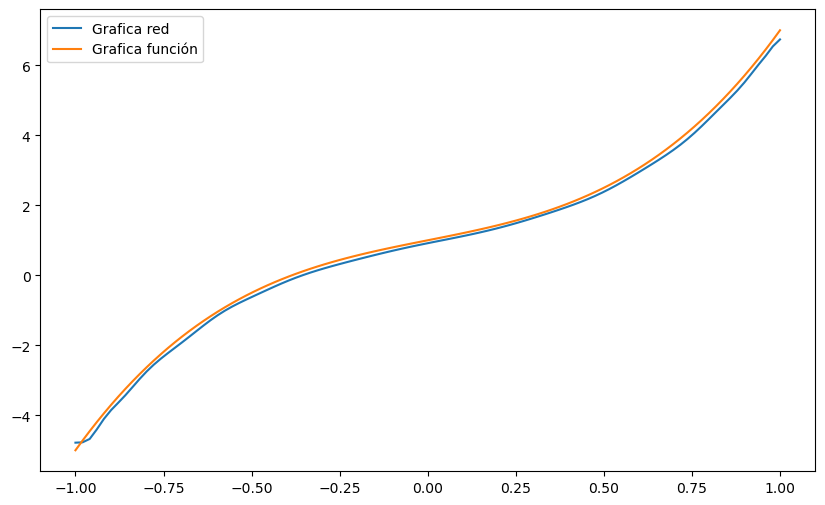

In [32]:
plt.figure(figsize=(10,6))
plt.plot(x_test,a)
plt.plot(x_test, 1+2*x+4*(x**3))
legend = ['Grafica red','Grafica función']
plt.legend(loc='upper left', labels= legend)
plt.show()